# Question 1



In order for a Lyapunov function to exist, two conditions must be satisfied: 

1. The weight matrix representing the weights between neurons must be symmetric. I.e. the weight in index $[i][j]$ is equal to the weight in index $[j][i]$. 
2. The gain function must be monotonically increasing. 

This system obeys these two rules. 
1. The weight from neuron j to neuron i is $w_{ij} = e^{cos(k(\theta_1 - theta_2 - \phi))}$. Since we are given the case that $\phi = 0$, the equation for the weight from neuron j to neuron i is now $w_{ij} = e^{cos(k(\theta_i - \theta_j))}$. The weight from neuron i to neuron j is $w_{ji} = e^{cos(k(\theta_j - \theta_i))} = w_{ji} = e^{cos(-k(\theta_i - \theta_j))}$. Since $cos(x)$ is an even function, we know that $cos(x) = cos(-x)$, so $cos(k(\theta_i - \theta_j) = cos(-k(\theta_i - \theta_j)$. Therefore, $e^{cos(k(\theta_j - \theta_i))} = e^{cos(-k(\theta_i - \theta_j))}$, so $w_{ij} = w_{ji}$. Therefore, $W[i][j] = W[j][i]$, so the weight matrix is symmetric. This condition is satisfied.
2. The gain function for this system is $s = g(\bar{u})$ where $g(x) = \frac{1}{1+e^{-x}}$. Thus, we need to show that $g(x)$ is monotonically increasing. As shown in the graph below, $g(x)$ is monotonically increasing across its entire domain, so $\frac{dg}{dx} > 0$ for the entire domain of $g$. This condition is satisfied. 

Since both conditions are satisfied, a Lyapunov function exists for this system.

# Question 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math
from random import random 

In [7]:
def s(u): 
  s = np.reshape(np.zeros(100),(100,1))
  for i in range(len(u)): 
    s[i] = 1/(1+math.exp(-u[i]))
  return s
def w(k,theta_i,theta_j,phi,b):
  return math.exp(math.cos(k*(theta_i-theta_j-phi)))-b
def weight_matrix(k,phi,b):
  # Empty Matrix
  N = 100
  W = np.reshape(np.zeros(N*N),(N,N))
  # Fill the matrix 
  for r in range(len(W)):
    # r represents theta_i
    theta_i = 2*math.pi*r/N
    for c in range(len(W[0])):
      # c represents theta_j
      theta_j = 2*math.pi*c/N
      W[r][c] = w(k,theta_i,theta_j,phi,b)
  return W
def u_prime(u,W):
  return -u+np.matmul(W,s(u))
# Make the u state vector 
def generate_input(N):
  u = np.reshape(np.zeros(N), (N,1))
  u.shape
  for i in range(len(u)):
    u[i] = random() * 0.01
  return u


In [8]:
def run_simulation(k,phi,b):
  # Generate Input
  u = generate_input(100)
  plt.figure()
  plt.plot(u)
  plt.ylim(0,1)
  plt.title("Random Input ")

  # Generate weight matrix
  W = weight_matrix(k,phi,b)

  # Run simulation 
  dt = .001
  time = np.arange(0,500,dt)
  for t in range(1, len(time)):
    u = u + dt * u_prime(u,W)
  return u 

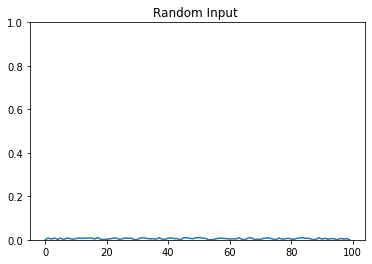

In [5]:
k = 1
phi = 0
b = 2
u = run_simulation(k,phi,b)

Text(0, 0.5, 'Relative Firing Rate')

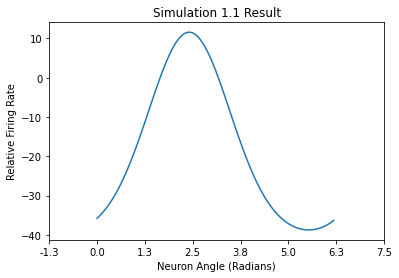

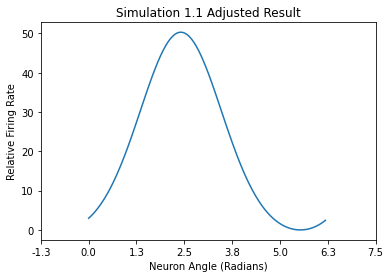

In [6]:
plt.plot(u)
plt.title("Simulation 1.1 Result")
plt.xlabel("Neuron Angle (Radians)")
plt.ylabel("Relative Firing Rate")
locs, labels = plt.xticks()
labels = [round(float(item)*2*math.pi/100,1) for item in locs]
plt.xticks(locs, labels)

plt.figure()
fixed_u = u - np.min(u)
plt.plot(fixed_u)
locs, labels = plt.xticks()
labels = [round(float(item)*2*math.pi/100,1) for item in locs]
plt.xticks(locs, labels)

plt.title("Simulation 1.1 Adjusted Result")
plt.xlabel("Neuron Angle (Radians)")
plt.ylabel("Relative Firing Rate")

I plotted the results of the simulation. However, since it doesn't make sense to have a negative firing rate, I shifted the entire u state curve up so that the minimum relative firing rate is 0. 

# Question 4

Peak Times: 
[100000, 200000, 300000, 400000]
Peak Angles: 
[40, 67, 95, 22]


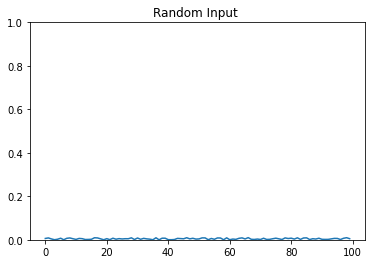

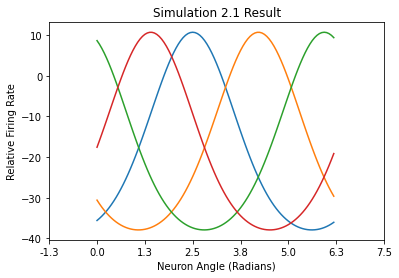

In [14]:
def run_asymmetric_simulation(k,phi,b):
  # Generate Input
  u = generate_input(100)
  plt.figure()
  plt.plot(u)
  plt.ylim(0,1)
  plt.title("Random Input ")

  # Generate weight matrix
  W = weight_matrix(k,phi,b)
  plt.figure()
  # Run simulation 
  dt = .001
  time = np.arange(0,500,dt)
  peak_times = []
  peak_angles = []
  for t in range(1, len(time)):
    u = u + dt * u_prime(u,W)
    if ((t % 100000) == 0):
      plt.plot(u)
      peak_times.append(t)
      peak_angles.append(np.argmax(u))
  plt.title("Simulation 2.1 Result")
  plt.xlabel("Neuron Angle (Radians)")
  plt.ylabel("Relative Firing Rate")
  locs, labels = plt.xticks()
  labels = [round(float(item)*2*math.pi/100,1) for item in locs]
  plt.xticks(locs, labels)
  print("Peak Times: ")
  print(peak_times)
  print("Peak Angles: ")
  print(peak_angles)
  return u 
k = 1
phi = 0.2
b = 2
u1 = run_asymmetric_simulation(k,phi,b)


In [25]:
peak_angles = [40,67,95,22]
angle_changes = [67-40,95-67,22+(100-95)]
avg_angle_change = 2*math.pi*np.average(angle_changes)/100
avg_angle_change
angular_velocity = (avg_angle_change / 100) * 1000
angular_velocity

17.174039839624204

The order of the curve colors with respect to time is blue, orange, green, red. We can see that the curve shifts with respect to time. The curve maintains the same shape, suggesting that the steady state is shifitng in space to be centered around a different neurons (i.e. neurons at different angles). This is consistent with what we expect to see when the connections are asymmetric in regards to having a preferred angular direction where excitation on that side is heavier than on the other side of a neuron sending out excitatory signals. 

I calculated the average angular velocity by dividing the average angular distance that occurs in 100 ms intervals. 

$<d\theta> = \frac{1}{3} \sum \theta_i-\theta_j = 1.174   radians $

$\omega = \frac{<d\theta>}{dt} = \frac{1.174 radians}{100 ms} * \frac{1000 ms}{1 s} = 17.74 \frac{radians}{s}$

The $\phi$ terem is what creates the shift that makes the weight matrix asymmetric in favor of more heavily favoring on side of a neuron to excite. Therefore, in order to change the direction that is more heavily favored to the opposite side of the neuron, we need to change $\phi$ from being positive to negative. 

# Question 4

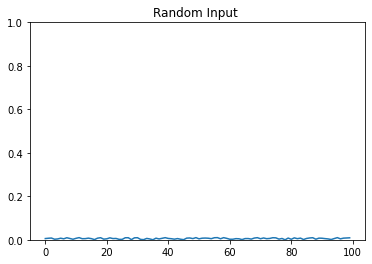

In [26]:
k = 3
phi = 0.2
b = 2
u2 = run_simulation(k,phi,b)

Text(0, 0.5, 'Relative Firing Rate')

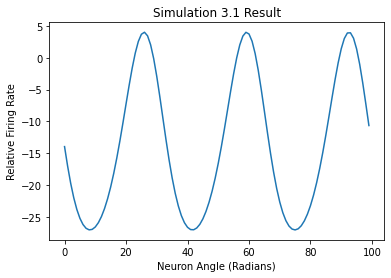

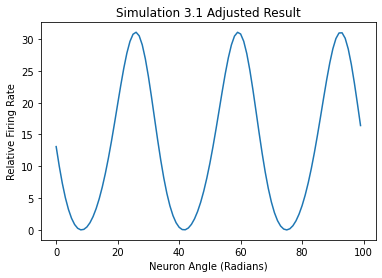

In [30]:
plt.plot(u2)
plt.title("Simulation 3.1 Result")
plt.xlabel("Neuron Angle (Radians)")
plt.ylabel("Relative Firing Rate")
plt.figure()
plt.plot(u2 - np.min(u2))
plt.title("Simulation 3.1 Adjusted Result")
plt.xlabel("Neuron Angle (Radians)")
plt.ylabel("Relative Firing Rate")

There are three peaks corresponding to three angular locations the network that are simultaneously at the highest relative firing rate. Since I set $\phi = 0$ for this simulation, we know that the steady state is not continuously moving angularly. Therefore, the steady state of this system is one in which there are three angular locations (distributed angularly equidistant from one another) that have the highest relative firing rate, and this situation is stable. 